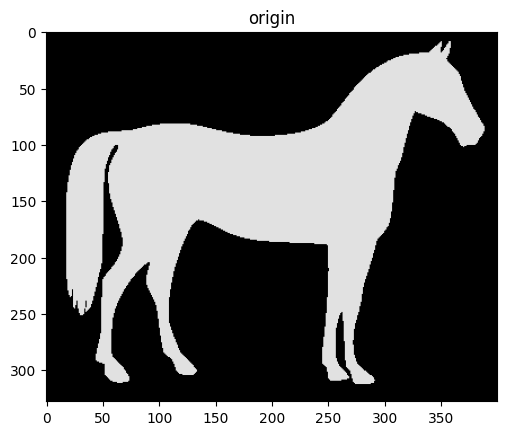

In [6]:
import skimage
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

orig = skimage.data.horse()
img = 225 - np.uint8(orig) * 225


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('origin')
plt.show()

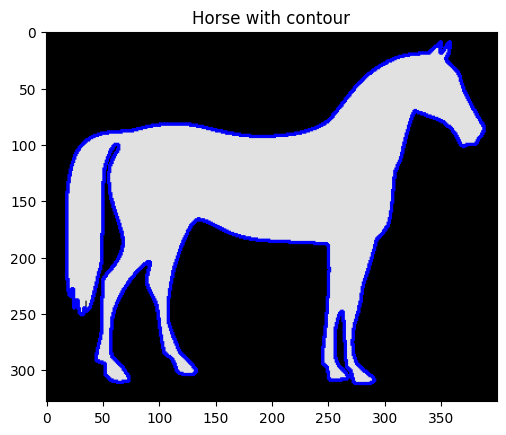

(Text(0.5, 1.0, 'Horse with contour'), None)

In [7]:
contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

img2 = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
cv.drawContours(img2, contours, -1, (255, 0, 0), 2)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title('Horse with contour'), plt.show()

In [9]:
print(type(contours))
print(len(contours))

<class 'tuple'>
1


In [10]:
contour = contours[0] # 몇가지 특징

m = cv.moments(contour)
area = cv.contourArea(contour)
cx, cy = m['m10'] / m['m00'], m['m01'] / m['m00']
perimeter = cv.arcLength(contour, True)
roundess = (4.0*np.pi*area)/(perimeter*perimeter)
print('면적=', area, '\n중점=(',cx,',',cy,')', '\n둘레=',perimeter, '\n둥근 정도=',roundess)

면적= 42390.0 
중점=( 187.72464024534088 , 144.43640402610677 ) 
둘레= 2296.7291333675385 
둥근 정도= 0.1009842680321435


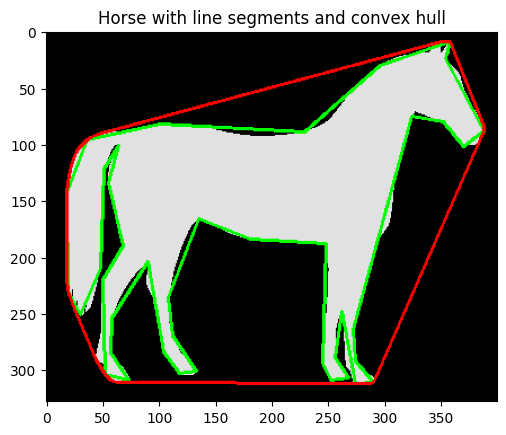

(Text(0.5, 1.0, 'Horse with line segments and convex hull'), None)

In [14]:
img3 = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

contour_approx = cv.approxPolyDP(contour, 8, True) # 직선 근사
cv.drawContours(img3, [contour_approx], -1, (0, 255, 0), 2)

hull = cv.convexHull(contour) # 블록 헐
hull = hull.reshape(1, hull.shape[0], hull.shape[2])
cv.drawContours(img3, hull, -1, (0,0,255), 2)

plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.title('Horse with line segments and convex hull'), plt.show()